# Assignment: Ionosphere Data Problem
### Dataset Description:
This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:
All 34 are continuous
The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.




### Data Set Characteristics:  

Multivariate

Number of Instances:

351

Area:

Physical

Attribute Characteristics:

Integer,Real

Number of Attributes:

34

Date Donated

N/A

Associated Tasks:

Classification

Missing Values?

N/A

Number of Web Hits:

N/A

# WORKFLOW :
Load Data
Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
Shuffle the data if needed.
Standardized the Input Variables. Hint: Centeralized the data
Split into 60 and 40 ratio.
Encode labels.
Model : 1 hidden layers including 16 unit.
Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
Train the Model with Epochs (100).
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
Prediction should be > 92%
Evaluation Step
Prediction
## Load Data:
Click Here to Download DataSet

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras import models,layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ionosphere_data.csv")
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [3]:
df =data['label']
df.value_counts()

g    225
b    126
Name: label, dtype: int64

In [5]:
data.sample(6)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
87,1,0,0.72727,-0.05000,0.89241,0.03462,1.00000,0.72727,0.66364,-0.05909,...,0.32727,0.56982,0.14673,0.42273,0.08182,0.48927,0.14643,1.00000,1.00000,b
248,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,b
229,1,0,0.73523,-0.38293,0.80151,0.10278,0.78826,0.15266,0.55580,0.05252,...,0.57549,0.44174,0.48200,0.12473,1.00000,0.35070,0.49721,0.30588,0.49831,g
160,1,0,0.01975,0.00705,0.04090,-0.00846,0.02116,0.01128,0.01128,0.04372,...,-0.01269,0.01834,-0.01128,0.00564,-0.01551,-0.01693,-0.02398,0.00705,0.00000,b
144,1,0,0.62745,-0.07843,0.72549,0.00000,0.60784,-0.07843,0.62745,-0.11765,...,-0.25490,0.52409,-0.24668,0.56863,-0.31373,0.43137,-0.21569,0.47059,-0.27451,b
224,0,0,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,...,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,1.00000,0.00000,0.00000,b


In [6]:
data.drop_duplicates()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [7]:
data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
info=data.iloc[:,:-1]
label=data.iloc[:,-1]

In [11]:
label = data["label"].map({'g':1,'b':0})
label

0      1
1      0
2      1
3      0
4      1
      ..
346    1
347    1
348    1
349    1
350    1
Name: label, Length: 351, dtype: int64

In [14]:
X_train=info.sample(frac=0.6,random_state=1)
X_test=info.sample(frac=0.4,random_state=1)
y_train=label.sample(frac=0.6,random_state=1)
y_test=label.sample(frac=0.4,random_state=1)

In [15]:
X_train=np.asarray(X_train).astype("float32")
X_test=np.asarray(X_test).astype("float32")

In [26]:
from keras import models, layers , optimizers ,regularizers,losses
model=models.Sequential()
model.add(layers.Dense(16,activation="relu",input_shape=(X_train.shape[1],)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(1,activation="sigmoid"))
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                560       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [28]:
network = model.fit(X_train,y_train,epochs=50,batch_size=1,verbose=1)

Epoch 1/50
211/211 [==============================] - 1s 1ms/step - loss: 0.9518 - accuracy: 0.3690
Epoch 2/50
211/211 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.8321
Epoch 3/50
211/211 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8483
Epoch 4/50
211/211 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8906
Epoch 5/50
211/211 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.9216
Epoch 6/50
211/211 [==============================] - 0s 1ms/step - loss: 0.2274 - accuracy: 0.9281
Epoch 7/50
211/211 [==============================] - 0s 1ms/step - loss: 0.1932 - accuracy: 0.9205
Epoch 8/50
211/211 [==============================] - 0s 2ms/step - loss: 0.1501 - accuracy: 0.9434
Epoch 9/50
211/211 [==============================] - 0s 1ms/step - loss: 0.1851 - accuracy: 0.9258
Epoch 10/50
211/211 [==============================] - 0s 1ms/step - loss: 0.1752 - accuracy: 0.9308

In [29]:
history_dict = network.history
history_dict.keys()
[u'accuracy', u'loss']

['accuracy', 'loss']

In [30]:
loss_acc=pd.DataFrame(network.history)
loss_acc.tail().T

,45,46,47,48,49
loss,0.039791,0.060148,0.055413,0.047767,0.050786
accuracy,0.985782,0.981043,0.985782,0.985782,0.985782


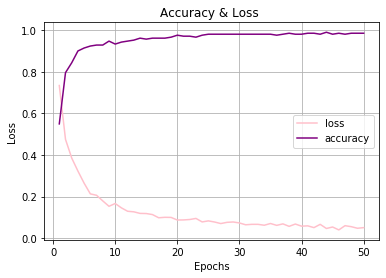

In [31]:
history_dict = network.history
loss_values = history_dict['loss']
accuracy_values = history_dict['accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'g', label='loss', color="pink")
plt.plot(epochs, accuracy_values, 'b', label='accuracy', color="purple")
plt.title('Accuracy & Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [32]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9929


[0.0294834915548563, 0.9928571581840515]

In [33]:
pred=model.predict(X_test)
pred.flatten().astype("U8")

array(['3.41221e', '0.999853', '3.416530', '0.999993', '0.996035',
       '0.999935', '0.999976', '0.998306', '5.152344', '0.007455',
       '0.999925', '0.999929', '2.749496', '0.999661', '1.192512',
       '1.446043', '0.988866', '6.719965', '0.999104', '2.114641',
       '0.217562', '0.958134', '0.999657', '0.995782', '1.298989',
       '0.999984', '0.999525', '0.999913', '0.987956', '0.999919',
       '7.115301', '0.999940', '2.824591', '0.000226', '0.999593',
       '0.999867', '0.003145', '2.368049', '0.999427', '0.999966',
       '0.993896', '0.999853', '0.993953', '0.999349', '0.999941',
       '0.997233', '0.999902', '0.999731', '0.000367', '0.999307',
       '0.991984', '0.999991', '0.005745', '2.963177', '0.999983',
       '0.996906', '4.098111', '2.738450', '1.192212', '0.999741',
       '0.998969', '5.636842', '0.999928', '4.76025e', '0.000115',
       '0.99998', '1.475251', '0.999846', '0.999721', '2.265633',
       '0.999817', '1.705970', '5.097451', '0.999932', '0.00019